## Navie Bayes in KDB+

In [207]:
/ Example words
positive : "I am happy because I today am learning NLP I am happy not sad hello guys how are you this is good evening I going to office today great evening"
negative : "I am sad I am not learning NLP today I am sad not happy this is bad evening I take leave today today is not good worst of all"

/Convert the words to symbol list

pos_lis: `$(" " vs positive)
neg_lis: `$(" " vs negative)

show pos_lis
show neg_lis

`I`am`happy`because`I`today`am`learning`NLP`I`am`happy`not`sad`hello`guys`how..
`I`am`sad`I`am`not`learning`NLP`today`I`am`sad`not`happy`this`is`bad`evening`..


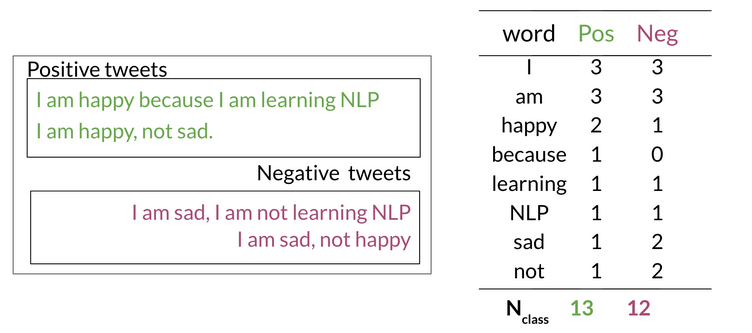

In [208]:
/postive list
w:()!()
{$[(x in (key w));w[x]+:1;w[x]:1]}'[pos_lis];

In [209]:
/negative list
v:()!()
{$[(x in (key v));v[x]+:1;v[x]:1]}'[neg_lis];

In [210]:
pos_t:1!([] word:(key w);pos: (value w))

In [211]:
pos_t

word    | pos
--------| ---
I       | 4  
am      | 3  
happy   | 2  
because | 1  
today   | 2  
learning| 1  
NLP     | 1  
not     | 1  
sad     | 1  
hello   | 1  
guys    | 1  
how     | 1  
are     | 1  
you     | 1  
this    | 1  
is      | 1  
good    | 1  
evening | 2  
going   | 1  
to      | 1  
..


In [212]:
neg_t:1!([] word:(key v); negv: (value v))

In [213]:
neg_t

word    | negv
--------| ----
I       | 4   
am      | 3   
sad     | 2   
not     | 3   
learning| 1   
NLP     | 1   
today   | 3   
happy   | 1   
this    | 1   
is      | 2   
bad     | 1   
evening | 1   
take    | 1   
leave   | 1   
good    | 1   
worst   | 1   
of      | 1   
all     | 1   


In [214]:
/Join the postive word table and negative word table
word_freq:pos_t lj neg_t
show word_freq

word    | pos negv
--------| --------
I       | 4   4   
am      | 3   3   
happy   | 2   1   
because | 1       
today   | 2   3   
learning| 1   1   
NLP     | 1   1   
not     | 1   3   
sad     | 1   2   
hello   | 1       
guys    | 1       
how     | 1       
are     | 1       
you     | 1       
this    | 1   1   
is      | 1   2   
good    | 1   1   
evening | 2   1   
going   | 1       
to      | 1       
..


In [215]:
/Unkey and Fill null with 0
word_freq: 0!(0^word_freq)
show word_freq

word     pos negv
-----------------
I        4   4   
am       3   3   
happy    2   1   
because  1   0   
today    2   3   
learning 1   1   
NLP      1   1   
not      1   3   
sad      1   2   
hello    1   0   
guys     1   0   
how      1   0   
are      1   0   
you      1   0   
this     1   1   
is       1   2   
good     1   1   
evening  2   1   
going    1   0   
to       1   0   
..


In [216]:
update pos_per:{x % sum word_freq`pos}'[pos], neg_per:{x % sum word_freq`negv}'[negv] from `word_freq

`word_freq


In [217]:
/Now we can see the frequency percentage of every word 
show word_freq

word     pos negv pos_per    neg_per   
---------------------------------------
I        4   4    0.1333333  0.173913  
am       3   3    0.1        0.1304348 
happy    2   1    0.06666667 0.04347826
because  1   0    0.03333333 0         
today    2   3    0.06666667 0.1304348 
learning 1   1    0.03333333 0.04347826
NLP      1   1    0.03333333 0.04347826
not      1   3    0.03333333 0.1304348 
sad      1   2    0.03333333 0.08695652
hello    1   0    0.03333333 0         
guys     1   0    0.03333333 0         
how      1   0    0.03333333 0         
are      1   0    0.03333333 0         
you      1   0    0.03333333 0         
this     1   1    0.03333333 0.04347826
is       1   2    0.03333333 0.08695652
good     1   1    0.03333333 0.04347826
evening  2   1    0.06666667 0.04347826
going    1   0    0.03333333 0         
to       1   0    0.03333333 0         
..


In [229]:
/ get_val function will calculate the positive probability and negative probability 
get_val:{exec pos_per%neg_per from word_freq where word=x}

## Example: 
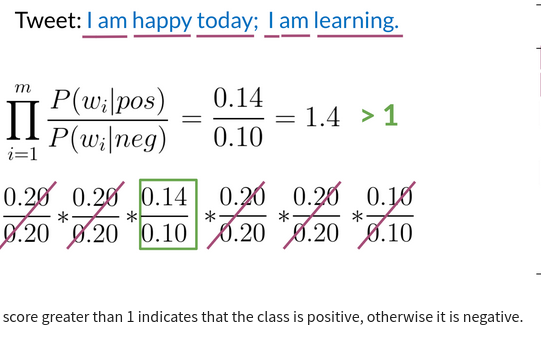

In [220]:
/test 
test:`$" " vs "I am not learning today"
show test

`I`am`not`learning`today


In [230]:
/Get the probability value of each word present in positive and negative
/ pos_prob = freq_of_word % total_pos_word
/ neg_prob = freq_of_word % total_neg_word
/ pos_prob % neg_prob
get_val'[test]

0.7666667
0.7666667
0.2555556
0.7666667
0.5111111


In [222]:
/ Check the score will greater than 1 or not. If yes it will be positive word or else negative word
check:{{$[(((*/) get_val'[x]) > 1)[0];`Positive;`Negative]}[`$(" " vs x)]} 

In [223]:
check "hello guys"

`Positive


In [226]:
check "today not good"

`Negative


In [227]:
check "great evening"

`Positive


In [228]:
check "I going to office"

`Positive
